In [38]:
import cv2
import numpy as np

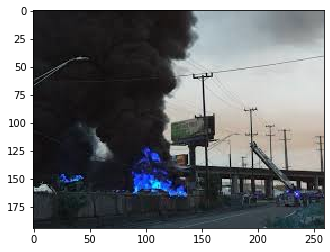

In [39]:
img=cv2.imread("D:\\Office data\\Train\\Fire\\image_1.jpg")
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

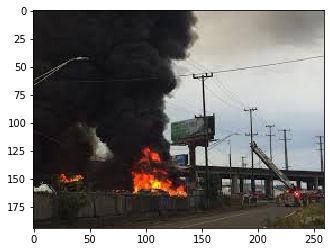

In [40]:
rgb_img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)
plt.show()

Now making a coloured 3d scatterplot of the above image

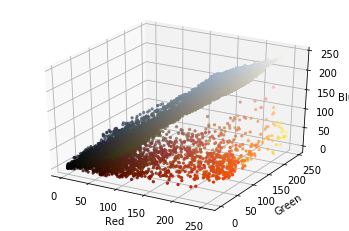

In [41]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
#Next splitting the image into component channels
r,g,b=cv2.split(rgb_img)
fig=plt.figure()
axis=fig.add_subplot(1,1,1,projection="3d")
#Normalizing the colours in the range 0-1
pixel_colors = rgb_img.reshape((np.shape(rgb_img)[0]*np.shape(rgb_img)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

As we can see that in the RGB image 3d plot,the orange parts of the image span across almost the entire range of red, green, and blue values.Since parts of fire stretch over the whole plot, segmenting fire out in RGB space based on ranges of RGB values would not be easy.

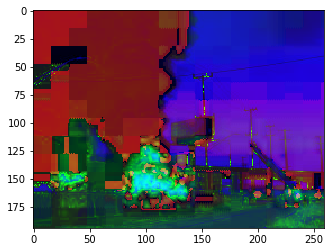

In [42]:
hsv_img=cv2.cvtColor(rgb_img,cv2.COLOR_RGB2HSV)
plt.imshow(hsv_img)
plt.show()

Generating the coloured 3d scatterplot of the HSV image..

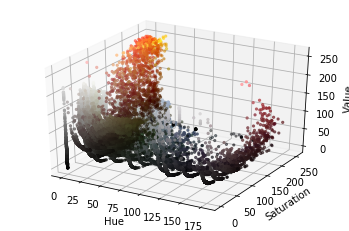

In [43]:
h, s, v = cv2.split(hsv_img)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In HSV space, Fire’s oranges are much more localized and visually separable. The saturation and value of the oranges do vary, but they are mostly located within a small range along the hue axis. 

Now picking out a range for light orange and dark orange..

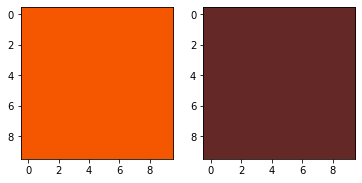

In [58]:
light_orange = (1, 155, 100)
dark_orange = (15, 255, 245)
#Now trying to display the colours chosen(matplotlib works only with rgb so we have converted hsv to rgb)
from matplotlib.colors import hsv_to_rgb
# building the small 10x10x3 squares, filled with the respective color
lo_square = np.full((10, 10, 3), light_orange, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_orange, dtype=np.uint8) / 255.0
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()



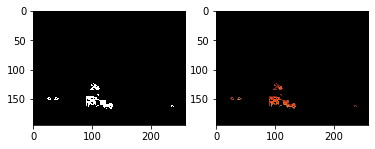

In [61]:
#Now masking is done to acheive the region of interest
mask = cv2.inRange(hsv_img, light_orange, dark_orange)
result = cv2.bitwise_and(img,img, mask=mask)
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

Now adding a second mask that looks for smoke..